In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
game_data = pd.read_csv("game_stats.csv")
games = pd.read_csv("games.csv")

combined_data = games.merge(game_data, left_on="id", right_on="id", validate="one_to_one")

combined_data = combined_data[combined_data['home.possessionTime'].notna()] # drop nan rows 
combined_data = combined_data[combined_data['away.possessionTime'].notna()] # drop nan rows
combined_data

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,5.7,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,3.4,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,0.4,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,3.0,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,3.4,8-50,2,1,1,27:00,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,401282765,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,3665.0,...,3.2,9-84,1,1,0,33:59,12.0,0.0,1.0,10.0
841,401282775,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,True,NaN,3558.0,...,4.7,7-41,1,1,0,32:37,29.0,0.0,1.0,7.0
842,401282784,2021,4,regular,2021-09-25T23:00:00.000Z,0.0,False,True,NaN,3936.0,...,3.9,7-50,2,1,1,37:14,62.0,1.0,1.0,8.0
843,401282811,2021,4,regular,2021-09-25T23:30:00.000Z,0.0,False,False,NaN,3861.0,...,1.9,4-18,2,0,2,36:24,-1.0,0.0,2.0,1.0


In [54]:
def home_point_diff(row):
    return row["home_points"] - row["away_points"]

def home_time_diff(row):
    return int(row["home.possessionTime"][:-3]) - int(row["away.possessionTime"][:-3])

combined_data["home_point_differential"] = combined_data.apply(home_point_diff, axis=1)
combined_data["home_possession_differential"] = combined_data.apply(home_time_diff, axis=1)

In [55]:
def away_point_diff(row):
    return row["away_points"] - row["home_points"]

def away_time_diff(row):
    return int(row["away.possessionTime"][:-3]) - int(row["home.possessionTime"][:-3])

combined_data["away_point_differential"] = combined_data.apply(away_point_diff, axis=1)
combined_data["away_possession_differential"] = combined_data.apply(away_time_diff, axis=1)

Text(0.5, 1.0, 'Home Team Possession Time vs Point Differential')

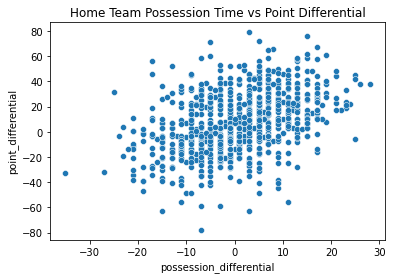

In [56]:
sns.scatterplot(
    data=combined_data, x="possession_differential", y="point_differential"
).set_title("Home Team Possession Time vs Point Differential")

Text(0.5, 1.0, 'Away Team Possession Time vs Point Differential')

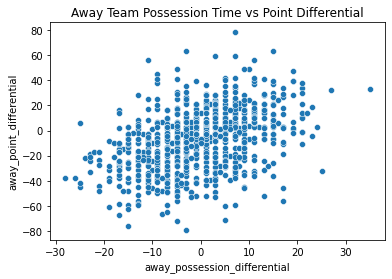

In [58]:
sns.scatterplot(
    data=combined_data, x="away_possession_differential", y="away_point_differential"
).set_title("Away Team Possession Time vs Point Differential")


In [59]:
# As you can see, having more possession is correlated with a greater point differential